**Logistic Regression**\
**x = 2 (Text), y = 1 (Propaganda_devices)**


In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import numpy as np
import seaborn as sns
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/propaganda/sonal_shyam_icolsi_2021/merged_propaganda_data_noheader.csv", header=None)
df.head(5)


Mounted at /content/drive/


,0,1
0,नये कृषि कानूनों को लेकर किसानों के आंदोलन का ...,0
1,इस मामले का हल नहीं निकल पाने के कारण किसानों ...,0
2,आज सुबह यहां टीकरी बॉर्डर पर एक किसान ने आत्मह...,0
3,हरियाणा के जींच से आए किसान कर्मवीर ने फांसी ल...,0
4,इससे किसानों का आक्रोश और बढ़ गया है.,0


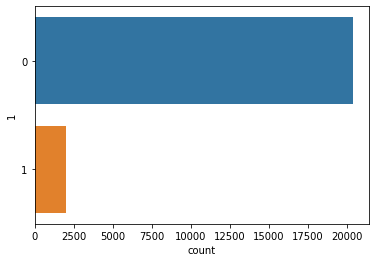

In [2]:
sns.countplot(y=1, data=df)

In [3]:
X = df[0]
y = df[1]

In [4]:
X

0        नये कृषि कानूनों को लेकर किसानों के आंदोलन का ...
1        इस मामले का हल नहीं निकल पाने के कारण किसानों ...
2        आज सुबह यहां टीकरी बॉर्डर पर एक किसान ने आत्मह...
3        हरियाणा के जींच से आए किसान कर्मवीर ने फांसी ल...
4                    इससे किसानों का आक्रोश और बढ़ गया है.
                               ...                        
22430    उनकी पार्टी एक जिम्मेदार विपक्ष के तौर पर काम ...
22431                      शिवसेना सीएम पद के लिए अड़ी रही
22432    कांग्रेस को एक जिम्मेदार विपक्ष होने का जनादेश...
22433    सरकार गठन का दावा करते हैं तो उन्हें सरकार बना...
22434    राउत ने कहा कि राज्य में राष्ट्रपति शासन लागू ...
Name: 0, Length: 22435, dtype: object

In [5]:
y

0        0
1        0
2        0
3        0
4        0
        ..
22430    1
22431    1
22432    1
22433    1
22434    1
Name: 1, Length: 22435, dtype: int64

**Split_train & test_data**

In [6]:
from sklearn.model_selection import train_test_split

**Convert_vector**

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X)
X_train_counts.shape

(22435, 4524)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train_counts.toarray(),y,test_size=0.2)

In [9]:
len(X_train)

17948

In [10]:
len(X_test)

4487

In [11]:
#X_train[1]
print(count_vect.get_feature_names())

['00', '000', '0000', '00000', '0002', '002', '005', '01', '012', '027', '028', '03', '04', '05', '055', '05pm', '06', '07', '08', '085', '087', '089', '09', '10', '100', '1000', '100ट', '100म', '100व', '101', '102', '1025', '102व', '1031', '104', '1045', '1047', '105', '107', '10700', '1071', '108', '1085', '10अप', '10कर', '10द', '10प', '10बज', '10म', '10ल', '10व', '10स', '10हफ', '11', '110', '1100', '110093', '1104', '111', '112', '1121', '113', '114', '116', '117', '119', '119व', '11द', '11मई', '11व', '12', '120', '1200', '1200ल', '121', '122', '1242', '1248', '125', '126', '128', '129', '1297', '129व', '12pm', '12अगस', '12घ', '12द', '12मई', '12ल', '12व', '13', '130', '1300', '1309', '1311', '134', '138', '139', '13मई', '14', '1400', '141', '144', '145', '1467', '1476', '1476क', '148', '1496', '14अगस', '14क', '14द', '14व', '15', '150', '1500', '1500मर', '150व', '151', '152', '153', '155', '156', '15म', '15मई', '15०', '16', '1600', '16000', '1630घ', '164', '16ज', '16मई', '16व', '17',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Training & Testing**\
**Logistic_Regression**

In [13]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [14]:
logmodel = logmodel.fit(X_train, y_train)

In [15]:
logmodel.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.metrics import classification_report

In [17]:
predictions = logmodel.predict(X_test)

In [18]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.96      4116\n           1       0.51      0.09      0.15       371\n\n    accuracy                           0.92      4487\n   macro avg       0.72      0.54      0.55      4487\nweighted avg       0.89      0.92      0.89      4487\n'

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4116
           1       0.51      0.09      0.15       371

    accuracy                           0.92      4487
   macro avg       0.72      0.54      0.55      4487
weighted avg       0.89      0.92      0.89      4487



In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm =confusion_matrix(y_test,predictions)
cm

array([[4085,   31],
       [ 339,   32]])

Text(33.0, 0.5, 'Truth')

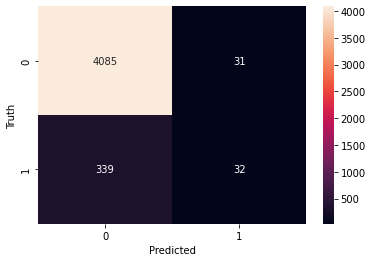

In [22]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,predictions)

0.9175395587252062